In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('train.csv')

In [5]:
data

,Rate,Comments
0,0,chỉ có dây cáp nguồn không có adapter sao sử d...
1,0,Chất lượng quá kém Mới dùng được 2 ngày loa ba...
2,0,Usb tôi vừa mới nhận usb này Rất bực bội vì cá...
3,2,Tuyệt vời. Hàng FPT cửa hàng
4,1,Chưa đo đúng bước chân rõ Nhiều khi gián đoạn ...
...,...,...
3034,0,không có bộ thu đi kèm Vừa nhận hàng xong tức ...
3035,0,Cũng bình thường Không mạnh như kỹ vọng Chắc t...
3036,2,tốt tốt đang tiền khi bỏ ra để mua giao hàng n...
3037,0,giao hàng lâu rửa tay một tí đã cháy màn hình ...


In [6]:
data = data[data['Rate']!=1]

In [7]:
data['Rate'] = data['Rate'].apply(lambda x: 1 if x == 2 else x)


In [8]:
data

,Rate,Comments
0,0,chỉ có dây cáp nguồn không có adapter sao sử d...
1,0,Chất lượng quá kém Mới dùng được 2 ngày loa ba...
2,0,Usb tôi vừa mới nhận usb này Rất bực bội vì cá...
3,1,Tuyệt vời. Hàng FPT cửa hàng
5,0,phủ sóng thấp quá đi khoảng 3 4m là mất sóng
...,...,...
3034,0,không có bộ thu đi kèm Vừa nhận hàng xong tức ...
3035,0,Cũng bình thường Không mạnh như kỹ vọng Chắc t...
3036,1,tốt tốt đang tiền khi bỏ ra để mua giao hàng n...
3037,0,giao hàng lâu rửa tay một tí đã cháy màn hình ...


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2152 entries, 0 to 3038
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Rate      2152 non-null   int64 
 1   Comments  2152 non-null   object
dtypes: int64(1), object(1)
memory usage: 50.4+ KB


In [10]:
data['Rate'].unique()

array([0, 1], dtype=int64)

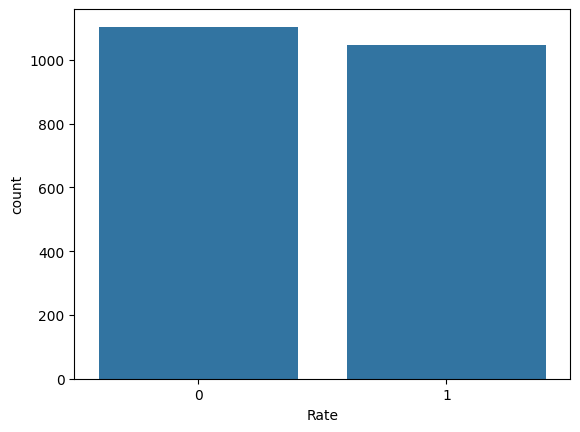

In [11]:
sns.countplot(data,x='Rate')
plt.show()

In [12]:
(data.isnull().sum() / len(data))*100

Rate        0.0
Comments    0.0
dtype: float64

In [13]:
data['Comments'] = data['Comments'].astype(str)

In [14]:
data['Comments'] = data['Comments'].str.lower()
data['Comments']

0       chỉ có dây cáp nguồn không có adapter sao sử d...
1       chất lượng quá kém mới dùng được 2 ngày loa ba...
2       usb tôi vừa mới nhận usb này rất bực bội vì cá...
3                            tuyệt vời. hàng fpt cửa hàng
5            phủ sóng thấp quá đi khoảng 3 4m là mất sóng
                              ...                        
3034    không có bộ thu đi kèm vừa nhận hàng xong tức ...
3035    cũng bình thường không mạnh như kỹ vọng chắc t...
3036    tốt tốt đang tiền khi bỏ ra để mua giao hàng n...
3037    giao hàng lâu rửa tay một tí đã cháy màn hình ...
3038    quá tuyệt vời với giá và miễn phí giao hàng ch...
Name: Comments, Length: 2152, dtype: object

In [15]:
data['Comments'] = data['Comments'].str.translate(str.maketrans('', '', string.punctuation))
data['Comments']

0       chỉ có dây cáp nguồn không có adapter sao sử d...
1       chất lượng quá kém mới dùng được 2 ngày loa ba...
2       usb tôi vừa mới nhận usb này rất bực bội vì cá...
3                             tuyệt vời hàng fpt cửa hàng
5            phủ sóng thấp quá đi khoảng 3 4m là mất sóng
                              ...                        
3034    không có bộ thu đi kèm vừa nhận hàng xong tức ...
3035    cũng bình thường không mạnh như kỹ vọng chắc t...
3036    tốt tốt đang tiền khi bỏ ra để mua giao hàng n...
3037    giao hàng lâu rửa tay một tí đã cháy màn hình ...
3038    quá tuyệt vời với giá và miễn phí giao hàng ch...
Name: Comments, Length: 2152, dtype: object

In [16]:
with open('stopwords.txt', 'r', encoding='utf-8') as f:
    stopwords = f.read().splitlines()

In [17]:
data['procesed'] = data['Comments'].\
apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

In [18]:
data

,Rate,Comments,procesed
0,0,chỉ có dây cáp nguồn không có adapter sao sử d...,dây cáp nguồn adapter sử dụng dây cáp nguồn ad...
1,0,chất lượng quá kém mới dùng được 2 ngày loa ba...,chất lượng kém dùng 2 loa bass âm rè rè dù mở ...
2,0,usb tôi vừa mới nhận usb này rất bực bội vì cá...,usb usb bực bội nắp usb cứng thể mở hộp đựng u...
3,1,tuyệt vời hàng fpt cửa hàng,tuyệt vời hàng fpt cửa hàng
5,0,phủ sóng thấp quá đi khoảng 3 4m là mất sóng,phủ sóng thấp khoảng 3 4m mất sóng
...,...,...,...
3034,0,không có bộ thu đi kèm vừa nhận hàng xong tức ...,thu kèm hàng xong tức hàng kèm thu chuột đề ng...
3035,0,cũng bình thường không mạnh như kỹ vọng chắc t...,bình mạnh kỹ vọng tường dày tiki giao hóa đơn
3036,1,tốt tốt đang tiền khi bỏ ra để mua giao hàng n...,tốt tốt tiền bỏ mua giao hàng nhanh đóng gói c...
3037,0,giao hàng lâu rửa tay một tí đã cháy màn hình ...,giao hàng lâu rửa tay tí cháy màn hình tóm chố...


In [19]:
from underthesea import word_tokenize

tokenized=data['procesed'].apply(word_tokenize)
tokenized.head(5)

0    [dây cáp, nguồn, adapter, sử dụng, dây cáp, ng...
1    [chất lượng, kém, dùng, 2, loa, bass, âm rè, r...
2    [usb, usb, bực bội nắp, usb, cứng thể, mở, hộp...
3                     [tuyệt vời, hàng, fpt, cửa hàng]
5         [phủ sóng, thấp, khoảng, 3, 4, m, mất, sóng]
Name: procesed, dtype: object

In [20]:
tokenized_list = tokenized.tolist()

In [21]:
# Convert the list of tokens into a string for each sentence
sentences = [' '.join(tokens) for tokens in tokenized_list]

In [22]:
print(sentences)

['dây cáp nguồn adapter sử dụng dây cáp nguồn adapter sử dụng hàng tiki training kì cục', 'chất lượng kém dùng 2 loa bass âm rè rè dù mở tin tưởng chất lượng', 'usb usb bực bội nắp usb cứng thể mở hộp đựng usb dường cắt', 'tuyệt vời hàng fpt cửa hàng', 'phủ sóng thấp khoảng 3 4 m mất sóng', '2 loa nhỏ nghe rè âm tốt hơi thất vọng sản phẩm dây cắm 2 loa dùng 1 tuần chập chờn', 'đặt i12 shop giao i11 thất vọng', 'đúng hàng đúng quà hài lòng', 'hứa cáp sạc giao', 'hình nét', 'sản phẩm cực tốt nha chất lượng tốt giá tiền đóng gói kỹ giao nhanh ủng hộ cửa hàng sản phẩm tuyệt vời cửa hàng 5 nha', 'giao hàng cực kì chậm đặt mua sản phẩm viết 8 giao thất vọng tiki', 'mua mở', 'chất lượng chấp nhậnai nhu cầu học hànhlướt web tốt ngon bổ rẻcảm ơn cửa hàng', 'máy chẳng phàn nàn đẹp tốt tỳ vết cửa hàng phục vụ chu đáo tận tình tặng kèm tai nghe sang chảnh', 'tốt mong đợi gặp chút khó khăn tốt', 'kết nối ổn định hai lòng thật thất vọng set up xong dùng 1 lỗi tùm lum liên tục mất sóng mặc dù vị trí 

# Bag of word
## Unigram

In [23]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

# Learn the vocabulary dictionary and return document-term matrix.
X = vectorizer.fit_transform(sentences)

# This step will convert text into tokens 
print(vectorizer.get_feature_names_out())

# Each row in the output array corresponds to a document in the corpus
print(X.toarray()) 

['01' '02' '03' ... 'ức' 'ứng' 'ứngtrên']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [24]:
from sklearn.model_selection import train_test_split
y=data['Rate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=0)

In [25]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import cross_val_score
cnb = ComplementNB()
cnb.fit(X_train, y_train)
cross_cnb = cross_val_score(cnb, X, y,n_jobs = -1,cv=3)
print("Cross Validation score = ",cross_cnb)                
print ("Train accuracy ={:.2f}%".format(cnb.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(cnb.score(X_test,y_test)*100))
train_acc_cnb=cnb.score(X_train,y_train)
test_acc_cnb=cnb.score(X_test,y_test)

Cross Validation score =  [0.91225627 0.91910739 0.90655509]
Train accuracy =93.96%
Test accuracy =92.11%


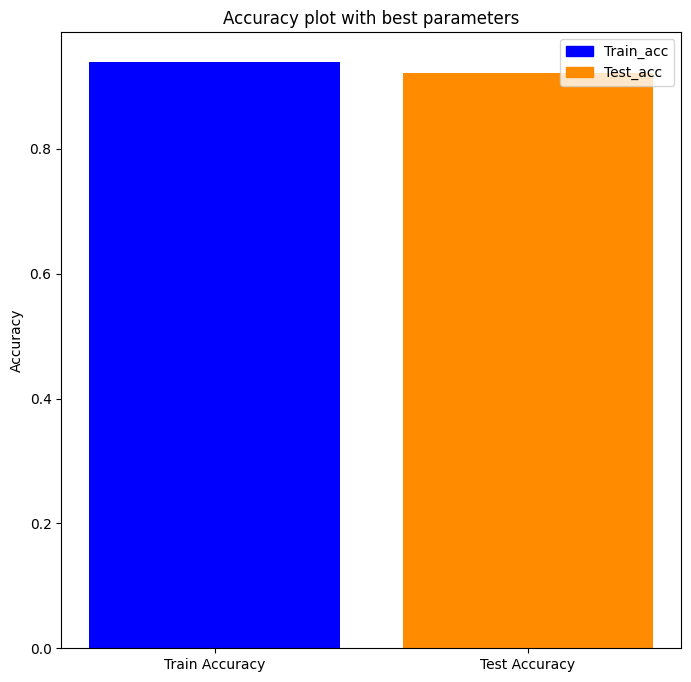

In [26]:
import matplotlib.patches as mpatches
data_cnb = [train_acc_cnb,test_acc_cnb]
labels = ['Train Accuracy','Test Accuracy']
plt.xticks(range(len(data_cnb)), labels)
plt.ylabel('Accuracy')
plt.title('Accuracy plot with best parameters')
plt.bar(range(len(data_cnb)), data_cnb,color=['blue','darkorange']) 
Train_acc = mpatches.Patch(color='blue', label='Train_acc')
Test_acc = mpatches.Patch(color='darkorange', label='Test_acc')
plt.legend(handles=[Train_acc, Test_acc],loc='best')
plt.gcf().set_size_inches(8, 8)
plt.show()

In [27]:
from sklearn.metrics import *
#Predict test data set
y_pred_cnb =cnb.predict(X_test)

#This is the confusion matrix :
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_cnb))

[[203  25]
 [  9 194]]


In [28]:
#Checking performance our model with classification report
print(classification_report(y_test, y_pred_cnb))

#Checking performance our model with ROC Score
roc_score_cnb=roc_auc_score(y_test, y_pred_cnb)
print("Area Under the Curve = ",roc_score_cnb)

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       228
           1       0.89      0.96      0.92       203

    accuracy                           0.92       431
   macro avg       0.92      0.92      0.92       431
weighted avg       0.92      0.92      0.92       431

Area Under the Curve =  0.9230079509117621


In [29]:
print("F1 score ={:.2f}%".format(f1_score(y_test, y_pred_cnb, average="macro")*100))
f1_cnb=f1_score(y_test, y_pred_cnb, average="macro")
print("Precision score ={:.2f}%".format(precision_score(y_test, y_pred_cnb, average="macro")*100))
precision_cnb=precision_score(y_test, y_pred_cnb, average="macro")
print("Recall score ={:.2f}%".format(recall_score(y_test, y_pred_cnb, average="macro")*100))  
recall_cnb=recall_score(y_test, y_pred_cnb, average="macro")

F1 score =92.11%
Precision score =92.17%
Recall score =92.30%


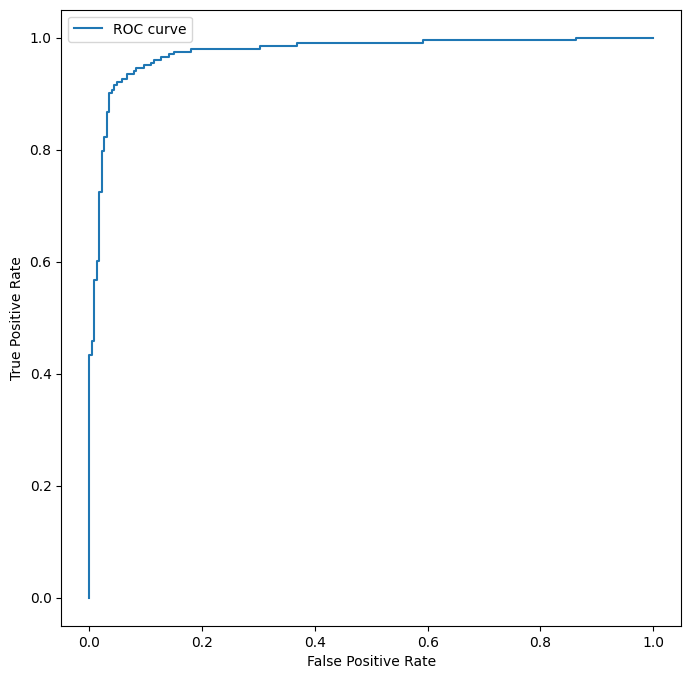

In [30]:
from sklearn.metrics import roc_curve
fpr_dt_1, tpr_dt_1,_=roc_curve(y_test,cnb.predict_proba(X_test)[:,1])
plt.plot(fpr_dt_1,tpr_dt_1,label="ROC curve")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.gcf().set_size_inches(8, 8)
plt.show()

In [31]:
import tkinter as tk

def show_result():
     comment = entry.get("1.0", tk.END)
     processed_comment = ' '.join([word for word in word_tokenize(comment) if word not in stopwords])
     processed_comment = vectorizer.transform([processed_comment])
     prediction = cnb.predict(processed_comment)
     prediction = int(prediction[0])
     if prediction == 0:
         result = "Tiêu cực"
     else:
         result = "Tích cực"
     result_entry.config(state='normal')
     result_entry.insert(0, result)
     result_entry.config(state='readonly')
    
def clear_entry():
     result_entry.config(state='normal')
     result_entry.delete(0, tk.END)
     result_entry.config(state='readonly')
     entry.delete("1.0", tk.END)
root = tk.Tk()
root.title("Phân tích cảm xúc khách hàng")
window_width = 500
window_height = 300

custom_font = ("Arial", 19)

screen_width = root.winfo_screenwidth()
screen_height = root.winfo_screenheight()

x_position = (screen_width - window_width) // 2
y_position = (screen_height - window_height) // 2

root.geometry(f"{window_width}x{window_height}+{x_position}+{y_position}")

entry = tk.Text(root, height=6, width=40)
entry.place(x=50, y=60)

button = tk.Button(root, text="Hiển thị kết quả", command=show_result, padx=10, pady=1)
button.place(x=50, y=180)

result_entry = tk.Entry(root, font=custom_font,width= 10)
result_entry.place(x=202, y=180)
result_entry.insert(0, "  ")
result_entry.configure(state='readonly')

reset_button = tk.Button(root, text="Reset", command=clear_entry, padx=10, pady=1)
reset_button.place(x=390,y=180)

root.mainloop()
